## Online Simulation-Based Digital Twin: Nibelungenbrücke

This notebook introduces an online simulation-based digital twin developed for the Nibelungenbrücke bridge. The orchestration system is designed to interact dynamically with the user by gathering key inputs; such as time, physical parameters, and spatial positions to perform real-time simulations of the bridge structure.

The simulations are powered by the FenicSXConcrete package and support both thermomechanical and structural deflection analyses. This framework enables physics-based modeling and continuous digital monitoring of the bridge's behavior.




Please run the code below once to install the packages!

In [1]:
#import sys
#!{sys.executable} -m pip install git+https://github.com/BAMresearch/FenicsXConcrete pint gmsh pytest jsonschema pandas pyproj tqdm pvlib meshio

Following code snippet adjusts the current working directory and modifies the system path to ensure proper module resolution.

In [2]:
import os
import sys

original_cwd = os.getcwd()
root_dir = os.getcwd()
orchestrator_dir = os.path.join(root_dir, 'nibelungenbruecke', 'scripts', 'digital_twin_orchestrator')
os.chdir(orchestrator_dir)
sys.path.insert(0, root_dir)

from nibelungenbruecke.scripts.digital_twin_orchestrator.orchestrator import Orchestrator

In [3]:
import importlib
import nibelungenbruecke.scripts.digital_twin_orchestrator.orchestrator as orch

importlib.reload(orch)


<module 'nibelungenbruecke.scripts.digital_twin_orchestrator.orchestrator' from '/home/msoenmez/Desktop/NibelungenbrueckeDemonstrator/nibelungenbruecke/scripts/digital_twin_orchestrator/orchestrator.py'>

### Definition of input parameters

This dictionary defines the configuration for running a digital twin simulation, including model selection, temporal settings, sensor definitions, and simulation options.

In [4]:
simulation_parameters = {
    'simulation_name': 'TestSimulation',
    'model': 'TransientThermal_1',
    'start_time': '2023-08-11T08:00:00Z',
    'end_time': '2023-08-11T16:10:00Z',
    'time_step': '10min',
    'virtual_sensor_positions': [
        {'x': 0.0, 'y': 0.0, 'z': 0.0, 'name': 'Sensor1'},
        {'x': 1.0, 'y': 0.0, 'z': 0.0, 'name': 'Sensor2'},
        {'x': 1.78, 'y': 0.0, 'z': 26.91, 'name': 'Sensor3'},
        {'x': -1.83, 'y': 0.0, 'z': 0.0, 'name': 'Sensor4'}
    ],
    'plot_pv': True,
    'full_field_results': True, # Set to True if you want full field results, the simulation will take longer and the results will be larger.
    'uncertainty_quantification': False, # Set to True if you want uncertainty quantification, the simulation will take longer and the results will be larger.
}

The Orchestrator class acts as the central controller for managing the entire digital twin simulation workflow. It handles configuration, setup, execution, and post-processing of simulations based on the provided input parameters.<br>
<br>
Orchestrator initialization with respect to the given parameters:

In [5]:
orchestrator = orch.Orchestrator(simulation_parameters)

Provide your key to MKP's API to registers it with the Orchestrator instance for secure communication with the backend services.

In [6]:
key=input("\nEnter the code to connect API: ").strip()
#key = ""
orchestrator.set_api_key(key)

Before proceeding with the simulation, the `load()` method verifies whether the coordinates of the virtual sensors lie within the boundaries of the mesh domain.

In [7]:
#orchestrator.load(simulation_parameters)

The simulation is executed using:

Info    : Reading '../../../use_cases/nibelungenbruecke_demonstrator_self_weight_fenicsxconcrete/input/models/mesh_3d 1.msh'...
Info    : 2443 entities
Info    : 2197 nodes
Info    : 12920 elements
Info    : Done reading '../../../use_cases/nibelungenbruecke_demonstrator_self_weight_fenicsxconcrete/input/models/mesh_3d 1.msh'
New model 'thermal_model' saved successfully.
Info    : Reading '../../../use_cases/nibelungenbruecke_demonstrator_self_weight_fenicsxconcrete/input/models/mesh_3d 1.msh'...
Info    : 2443 entities
Info    : 2197 nodes
Info    : 12920 elements
Info    : Done reading '../../../use_cases/nibelungenbruecke_demonstrator_self_weight_fenicsxconcrete/input/models/mesh_3d 1.msh'


100%|██████████| 49/49 [00:17<00:00,  2.82it/s]


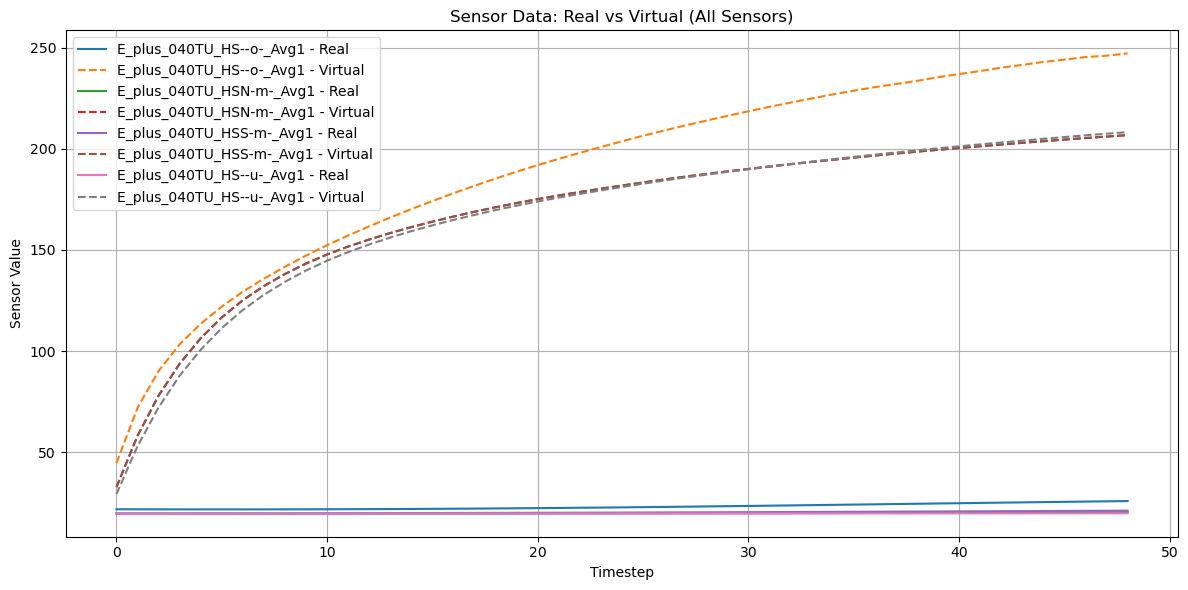

In [8]:

results = orchestrator.run()

### Results
The result at the sensors defined in simulation_parameters are plotted below.

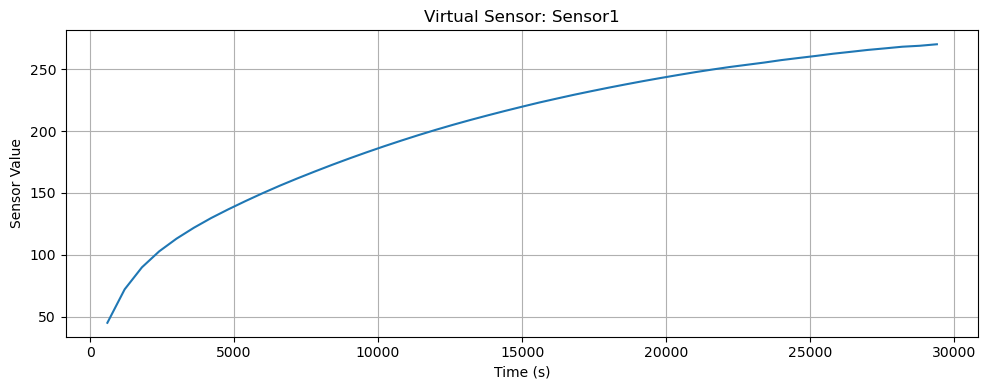

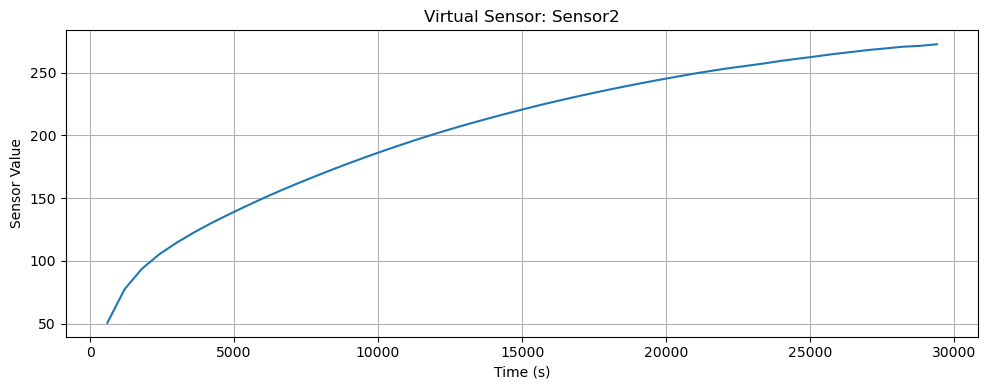

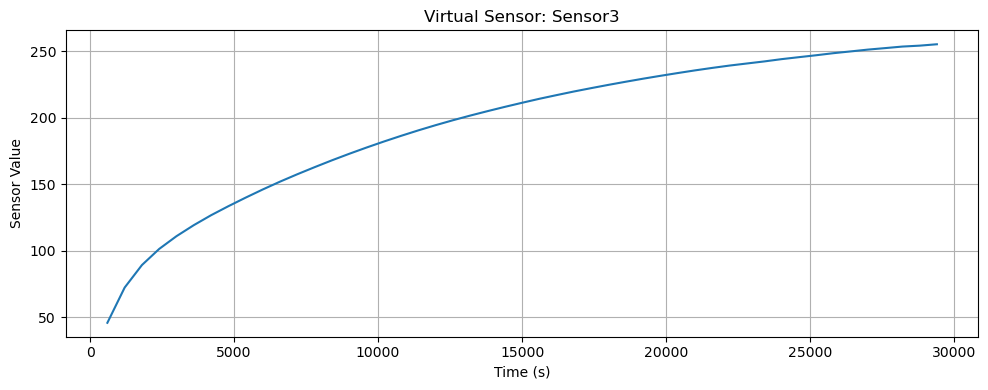

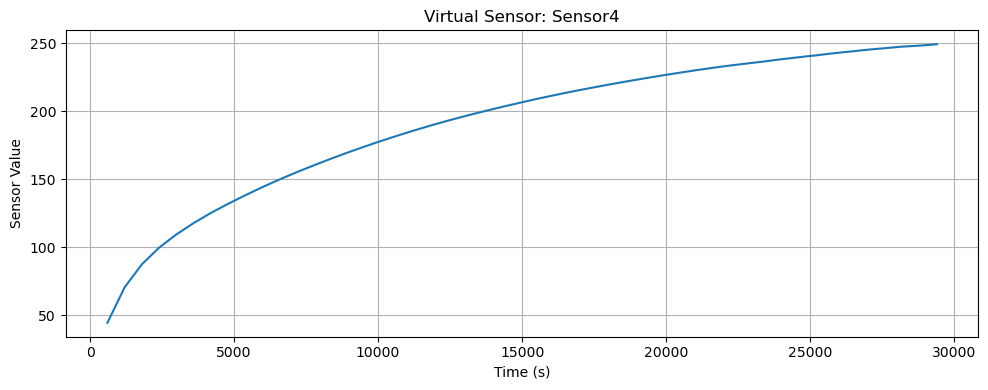

In [9]:
orchestrator.plot_virtual_sensor_data()

Plot comparison between model response and real sensors when available:

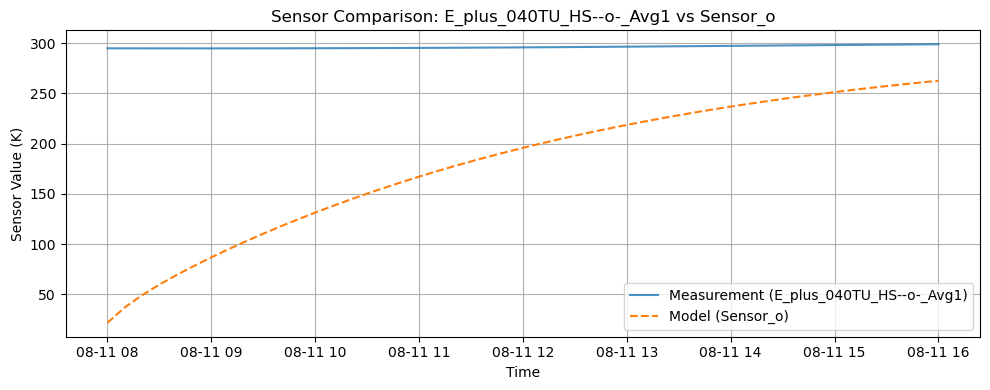

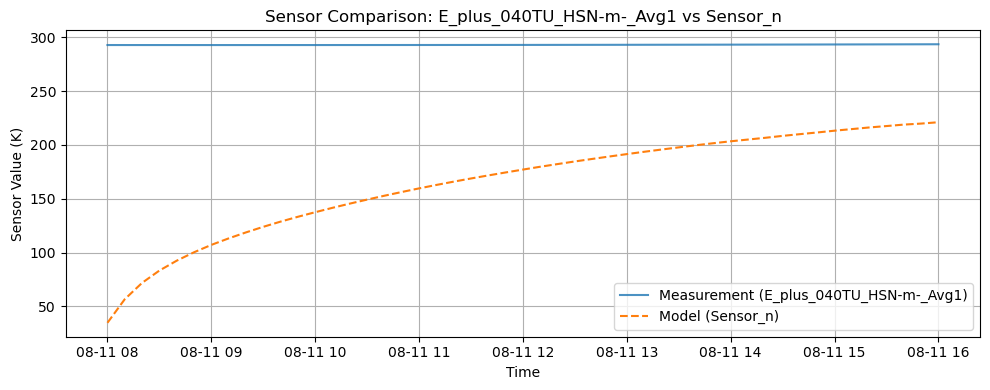

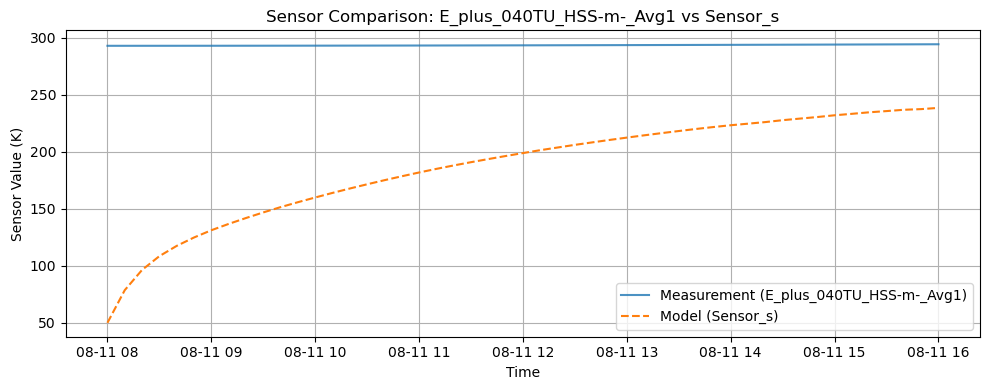

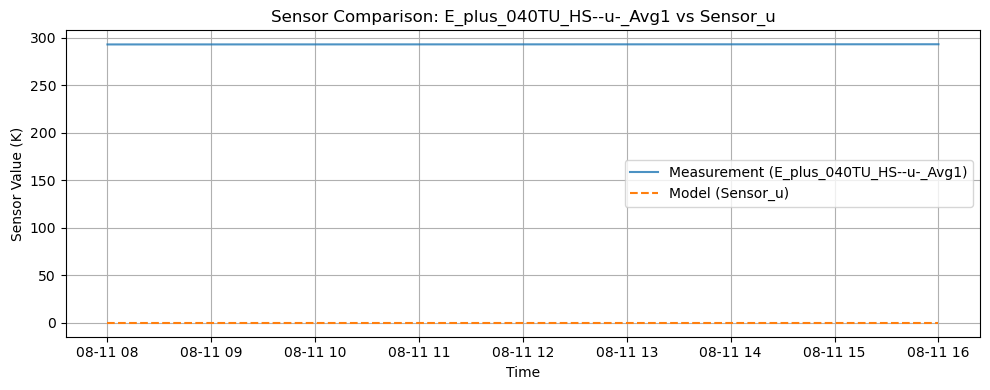

In [10]:
orchestrator.plot_real_sensor_vs_virtual_sensor()

## Additional results (only if run)

### Full-field response (3D)

The full-field simulation results can be reached with the following method.<br>

! Interactive visualization within the interface is not yet supported but will be introduced soon. Meanwhile files can be downloaded from the specified paths printed below.


No module named 'trame'

Falling back to a static output.
  warnings.warn(



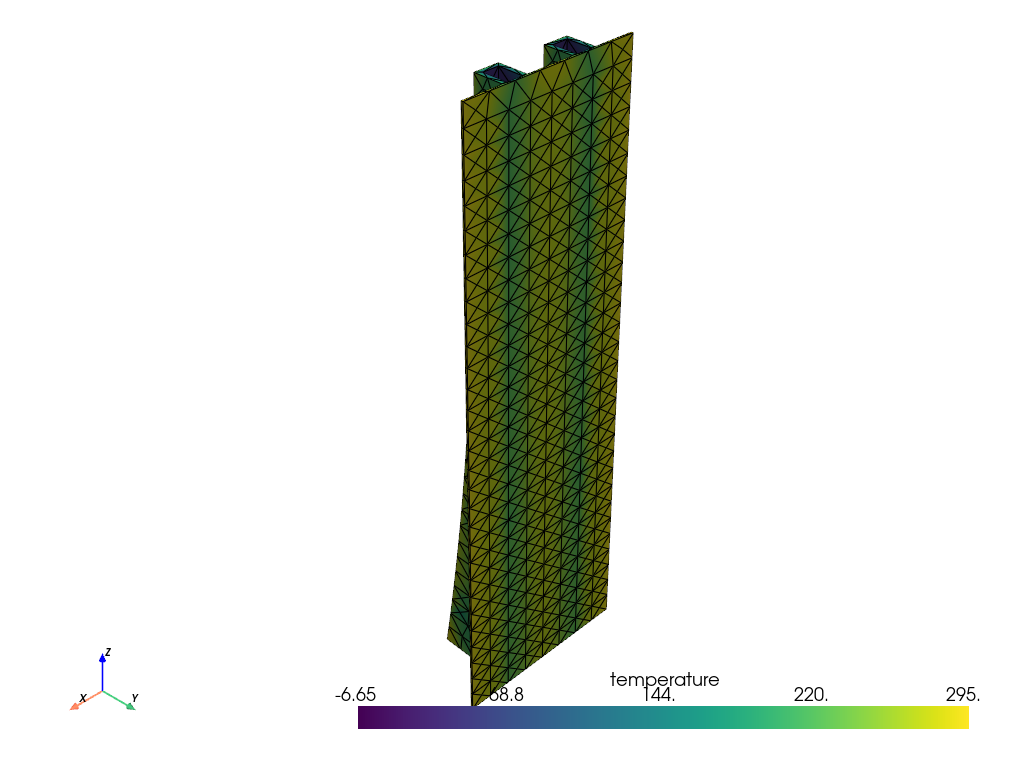

In [11]:
orchestrator.plot_full_field_response(simulation_parameters["full_field_results"])

### Thermal Model Uncertainty Quantification

Uncertainty quantification for the thermal model has been introduced. To enable this feature:  
- Set the parameter `uncertainty_quantification` to `True`  
- Ensure the parameter `plot_pv` is set to `False`  

This configuration activates the uncertainty analysis.

In [12]:
simulation_parameters = {
    'simulation_name': 'TestSimulation',
    'model': 'TransientThermal_1',
    'start_time': '2023-08-11T08:00:00Z',
    'end_time': '2023-08-13T08:10:00Z',
    'time_step': '10min',
    'virtual_sensor_positions': [
        {'x': 0.0, 'y': 0.0, 'z': 0.0, 'name': 'Sensor1'},
        {'x': 1.0, 'y': 0.0, 'z': 0.0, 'name': 'Sensor2'},
        {'x': 1.78, 'y': 0.0, 'z': 26.91, 'name': 'Sensor3'},
        {'x': -1.83, 'y': 0.0, 'z': 0.0, 'name': 'Sensor4'}
    ],
    'plot_pv': False,
    'full_field_results': True,
    'uncertainty_quantification': True,
}

Verify that all given virtual sensors fall within the mesh domain and then run the model.

In [13]:
#orchestrator.load(simulation_parameters)
orchestrator.run(simulation_parameters)

Info    : Reading '../../../use_cases/nibelungenbruecke_demonstrator_self_weight_fenicsxconcrete/input/models/mesh_3d 1.msh'...
Info    : 2443 entities
Info    : 2197 nodes
Info    : 12920 elements
Info    : Done reading '../../../use_cases/nibelungenbruecke_demonstrator_self_weight_fenicsxconcrete/input/models/mesh_3d 1.msh'
New model 'thermal_model_uq' saved successfully.
Info    : Reading '../../../use_cases/nibelungenbruecke_demonstrator_self_weight_fenicsxconcrete/input/models/mesh_3d 1.msh'...
Info    : 2443 entities
Info    : 2197 nodes
Info    : 12920 elements
Info    : Done reading '../../../use_cases/nibelungenbruecke_demonstrator_self_weight_fenicsxconcrete/input/models/mesh_3d 1.msh'


Solving time steps: 100%|██████████| 189/189 [01:02<00:00,  3.01it/s]


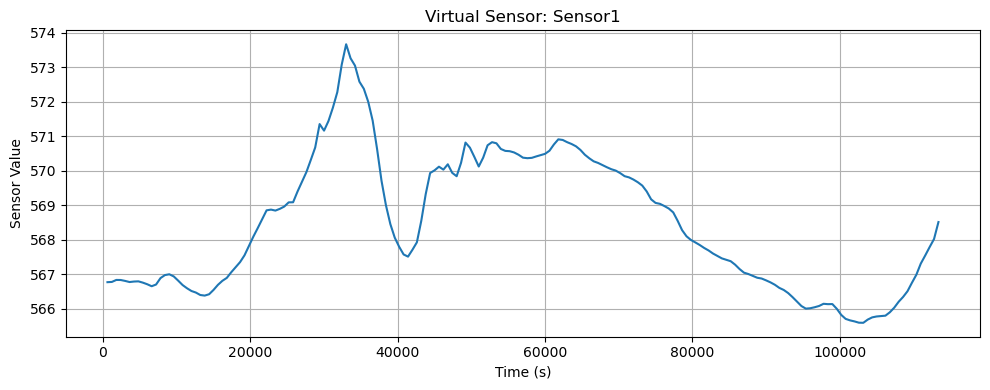

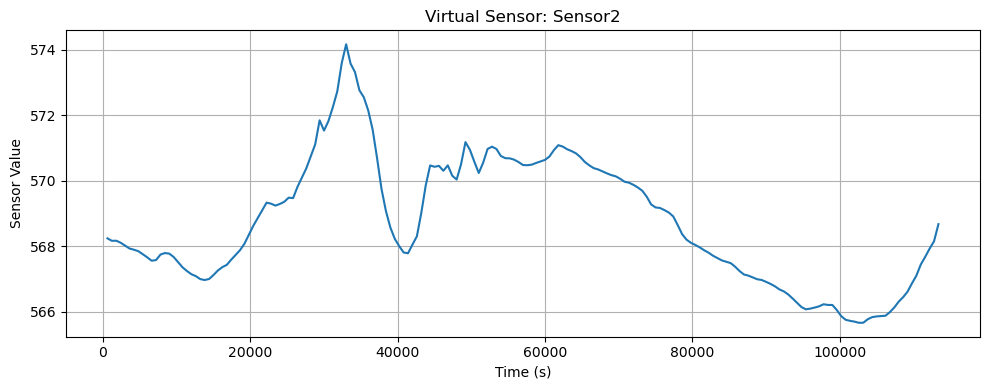

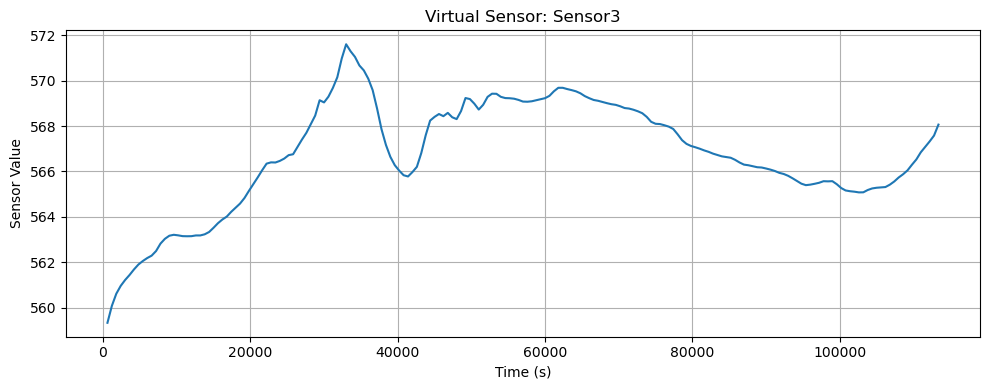

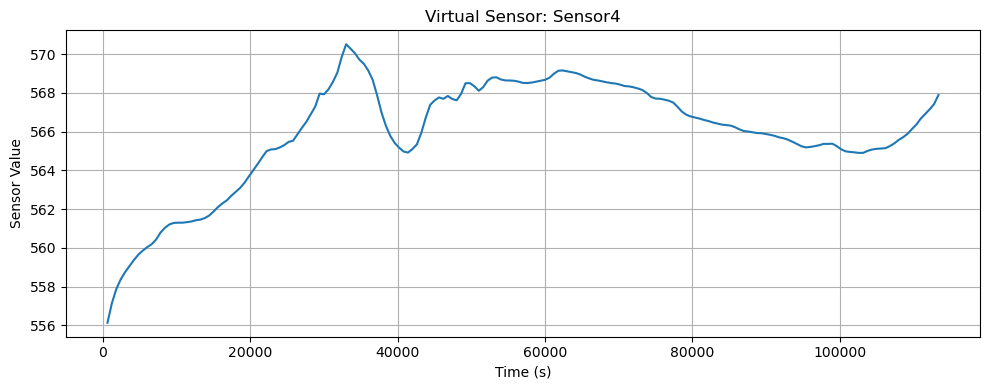

In [14]:
orchestrator.plot_virtual_sensor_data()

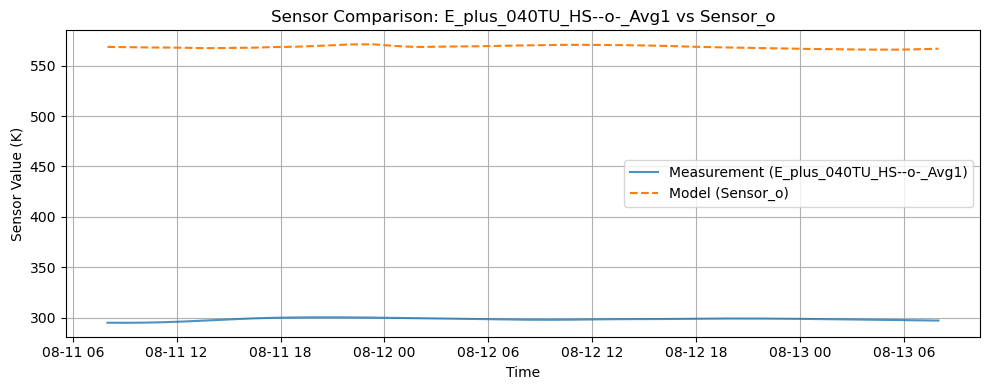

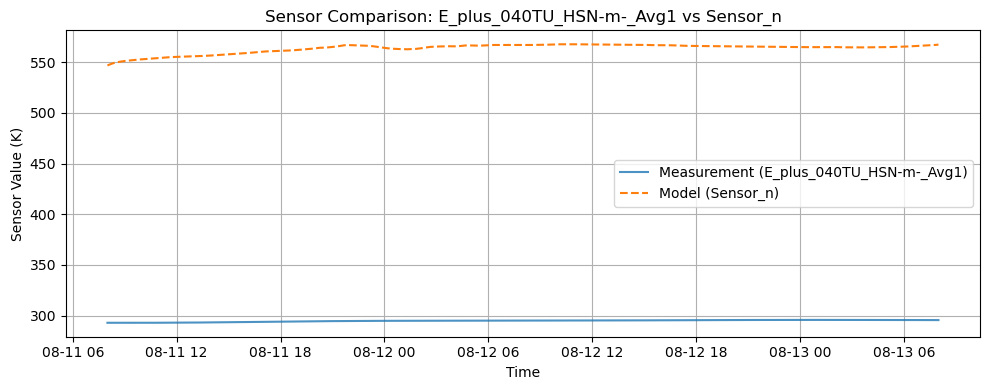

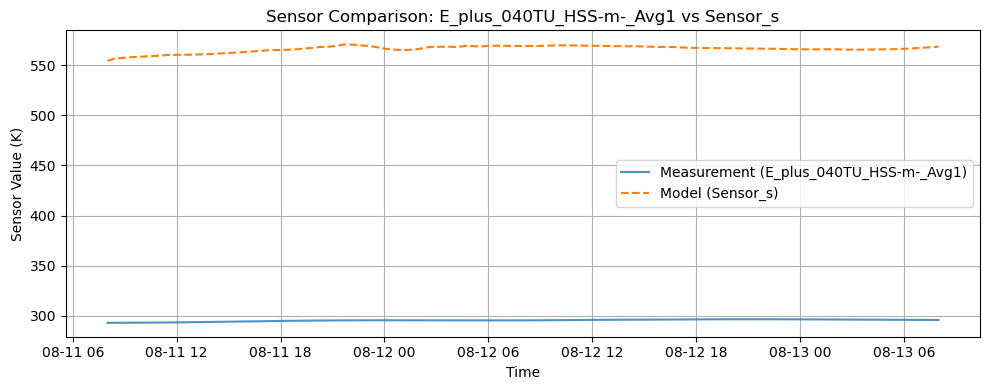

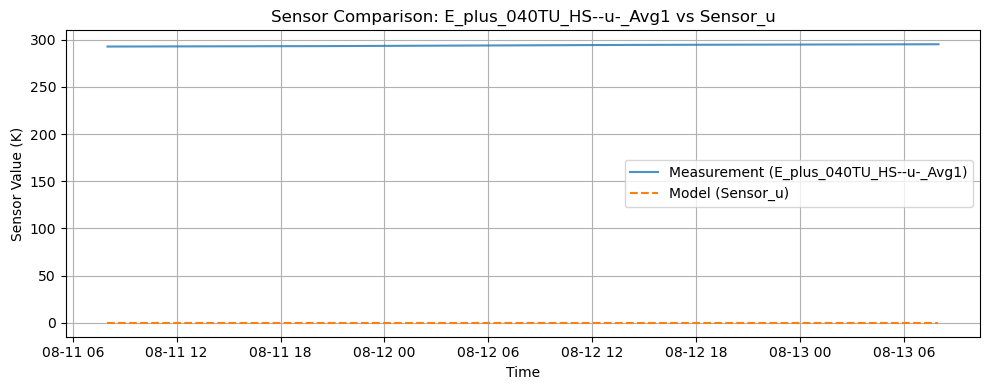

In [15]:
orchestrator.plot_real_sensor_vs_virtual_sensor()

In [16]:
orchestrator.plot_full_field_response(simulation_parameters["full_field_results"])

Full-field response can be reached from the following paths:
xdmf file path: ../../../use_cases/nibelungenbruecke_demonstrator_self_weight_fenicsxconcrete/output/paraview/Nibelungenbruecke_thermal.xdmf 
h5_path file path: ../../../use_cases/nibelungenbruecke_demonstrator_self_weight_fenicsxconcrete/output/paraview/Nibelungenbruecke_thermal.h5 
vtk output path : ../../../use_cases/nibelungenbruecke_demonstrator_self_weight_fenicsxconcrete/output/paraview/Nibelungenbruecke_thermal.vtk 


In [17]:
os.chdir(original_cwd)
print("Working directory restored to:", original_cwd)

Working directory restored to: /home/msoenmez/Desktop/NibelungenbrueckeDemonstrator
